<a href="https://colab.research.google.com/github/UchihaItachi95/ML-Algorithms/blob/Kmean/Kmean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMeans
## KMeans is a unsupervised learning method (unlabeled data) that clusters data set into k different clusters.Each sample is assigned to the cluster with the nearest mean,and then the means (centroids) and clusters are updated during an iterative optimization process.**bold text**

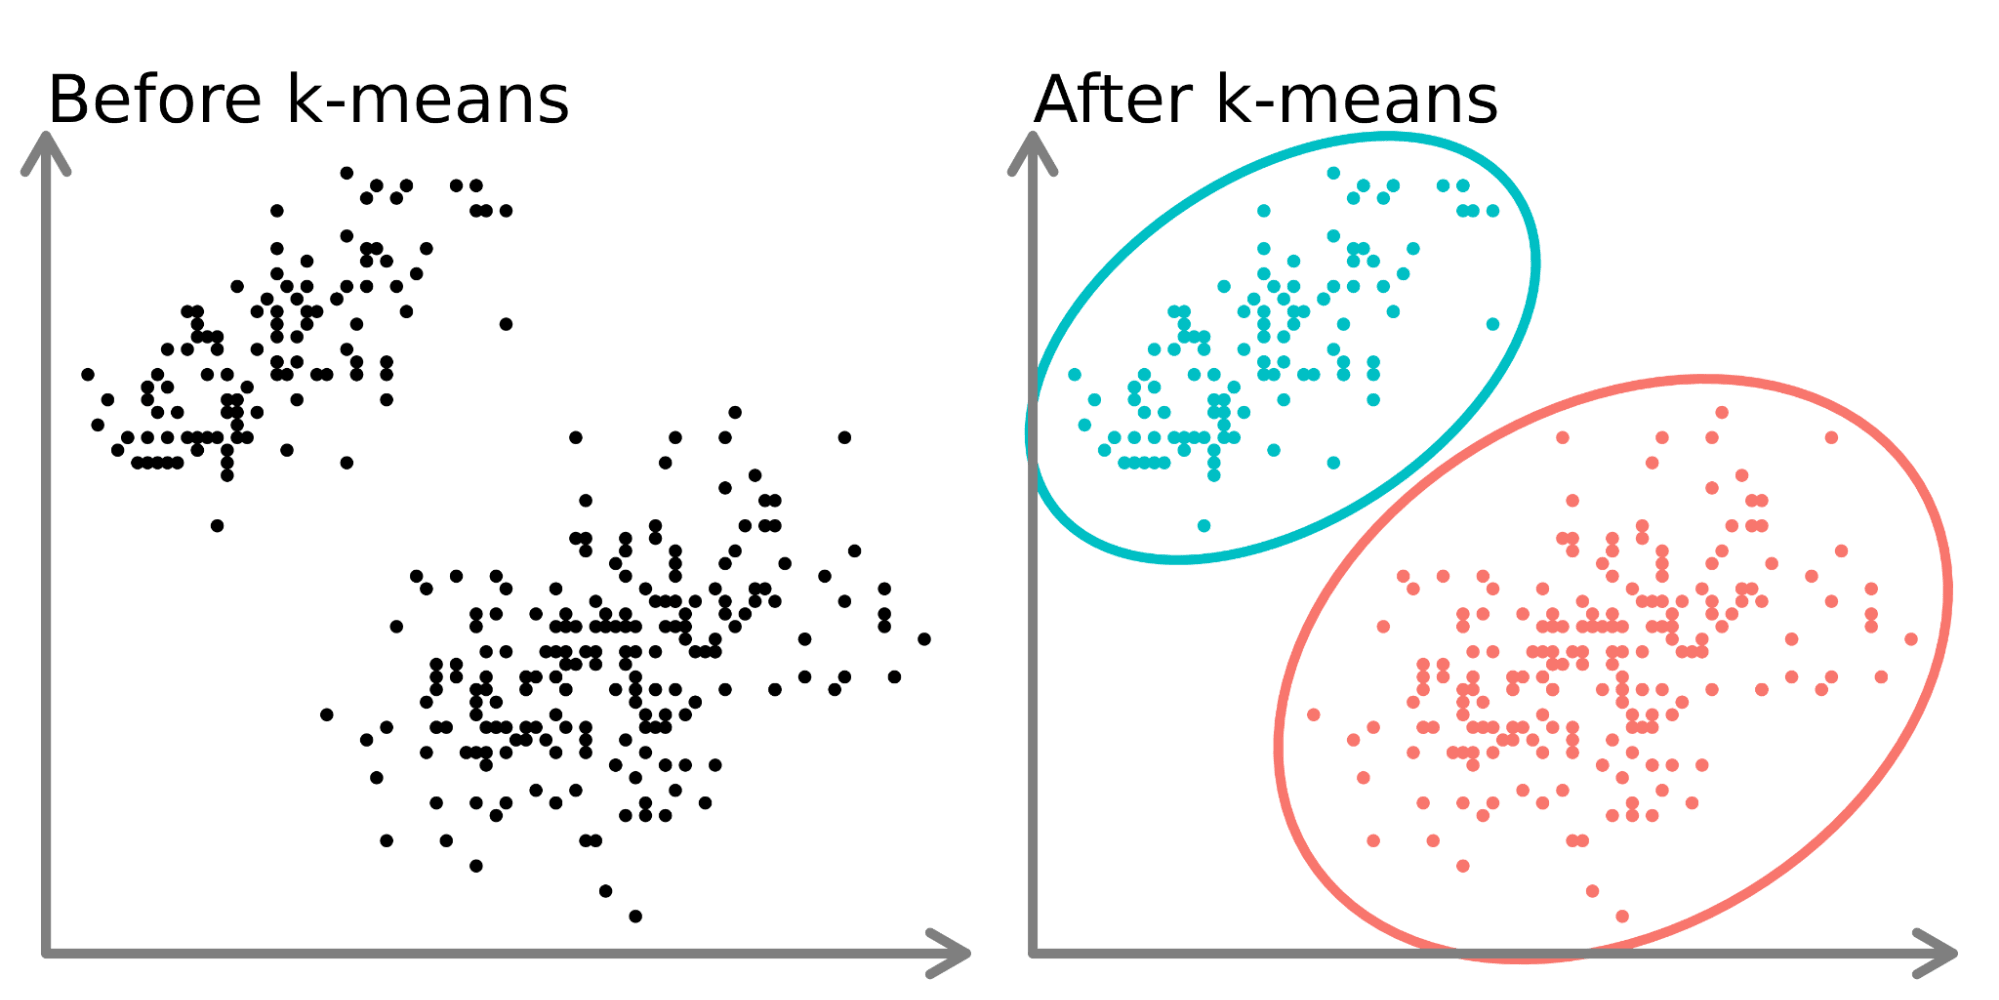

# Iterative optimization
## 1) Initialize cluster centers(randomly)
## 2) Repeat until converged:
        - Update cluster labels: Assign points to the nearest cluster center (centroid)
        - Update cluster centers (centroids): Set center to the mean of each cluster

# Unlabeled data
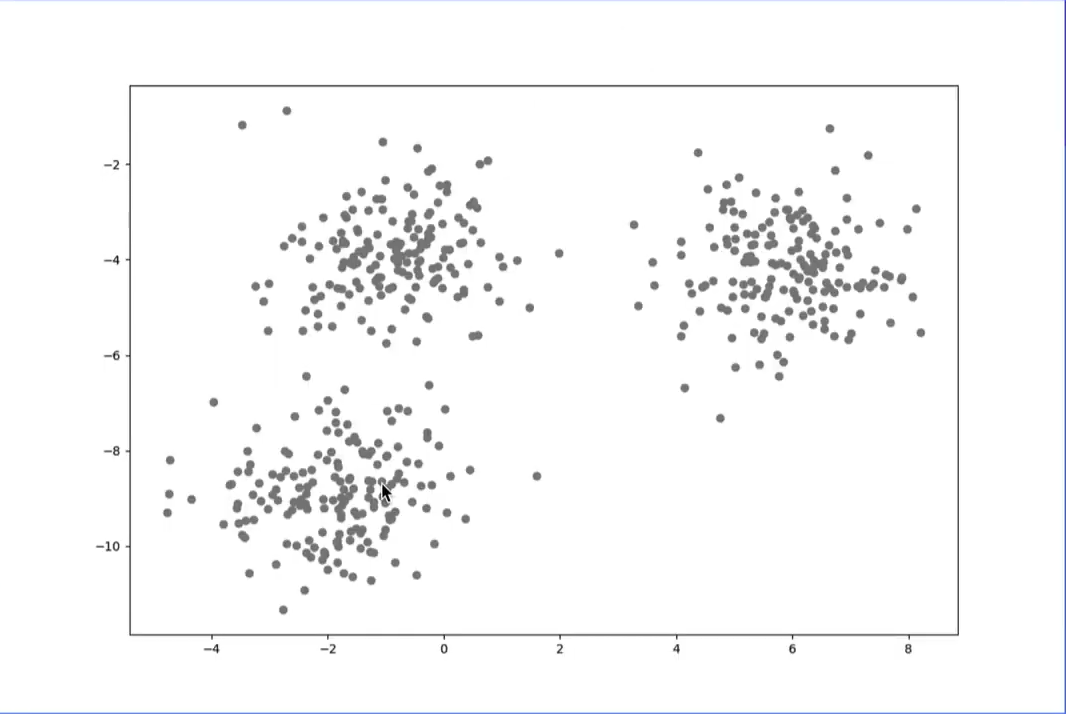

# **Intialize centroid(Randomly)**
## the circles represent the initialization of centroid in data
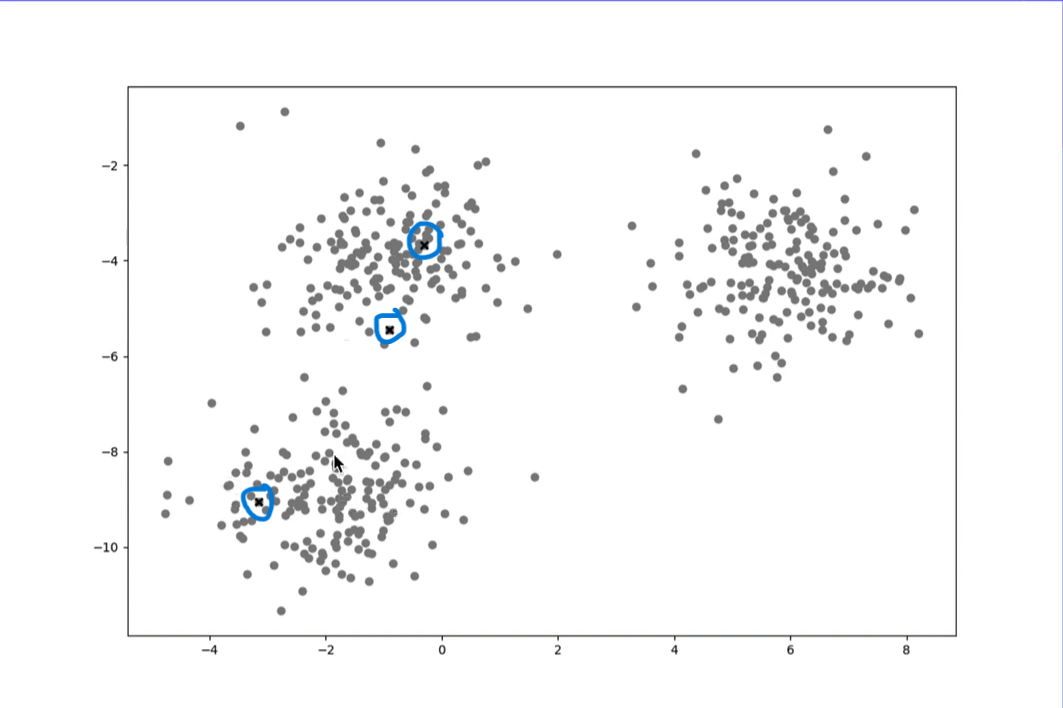

# Update cluster labels
## assign each lables to the nearest centroid
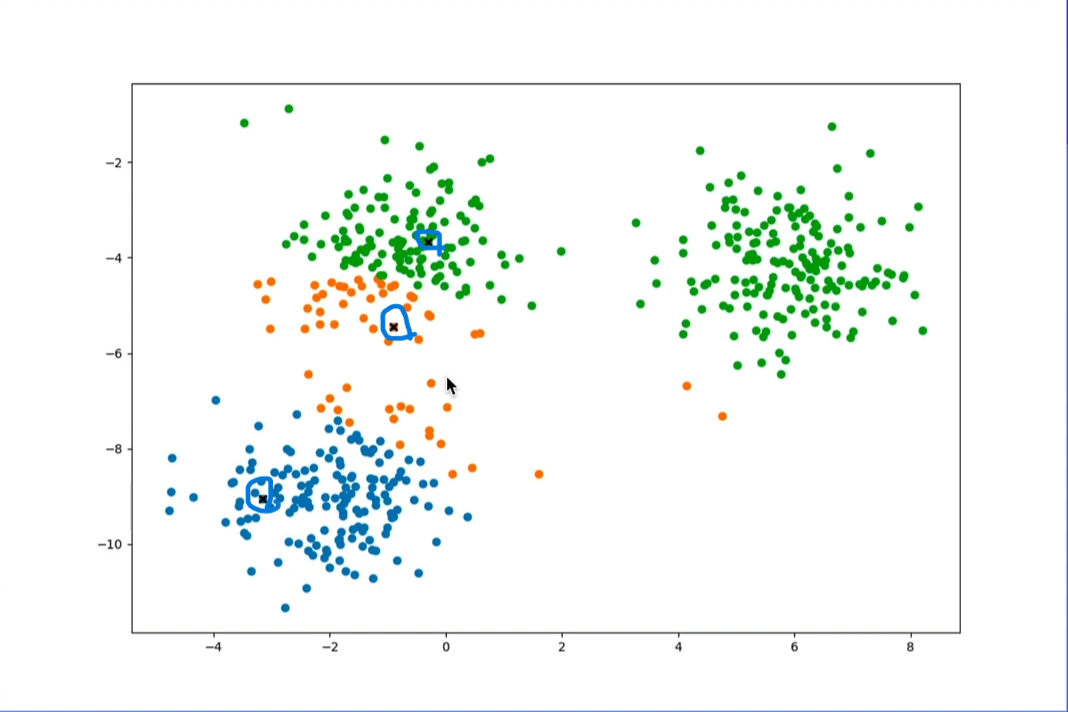

# Update the cluster centers
## calculate the mean of each cluster to update the cluster centers
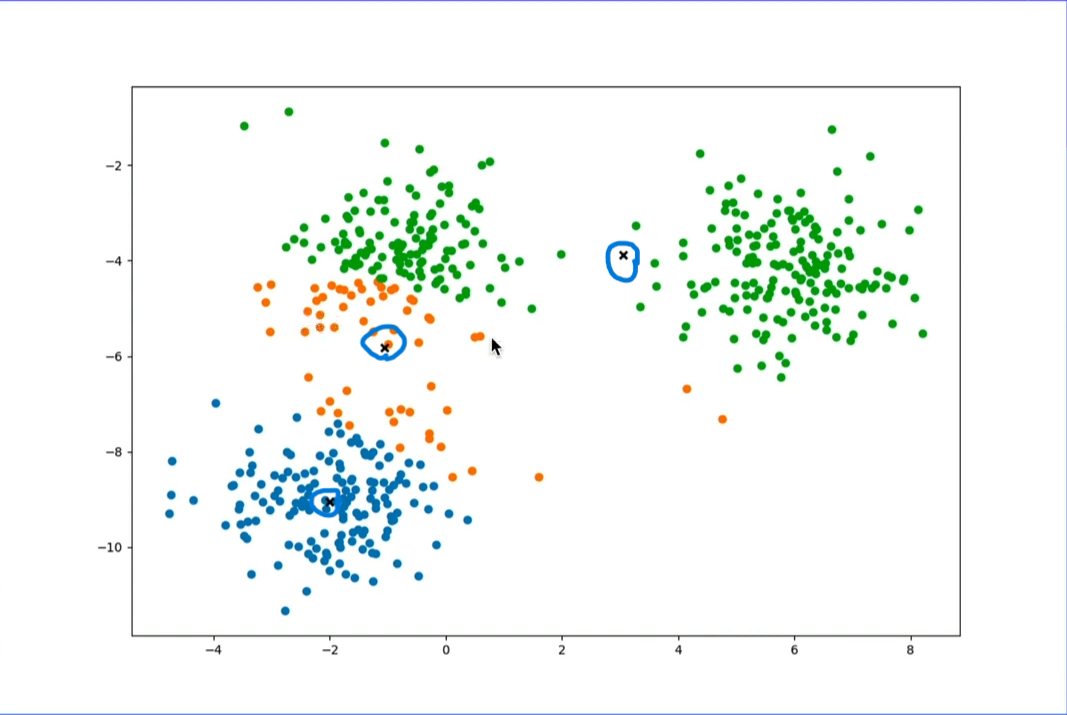

# Update the cluster labels again
## here after the centroids moves the labels assigned to each center will be updated
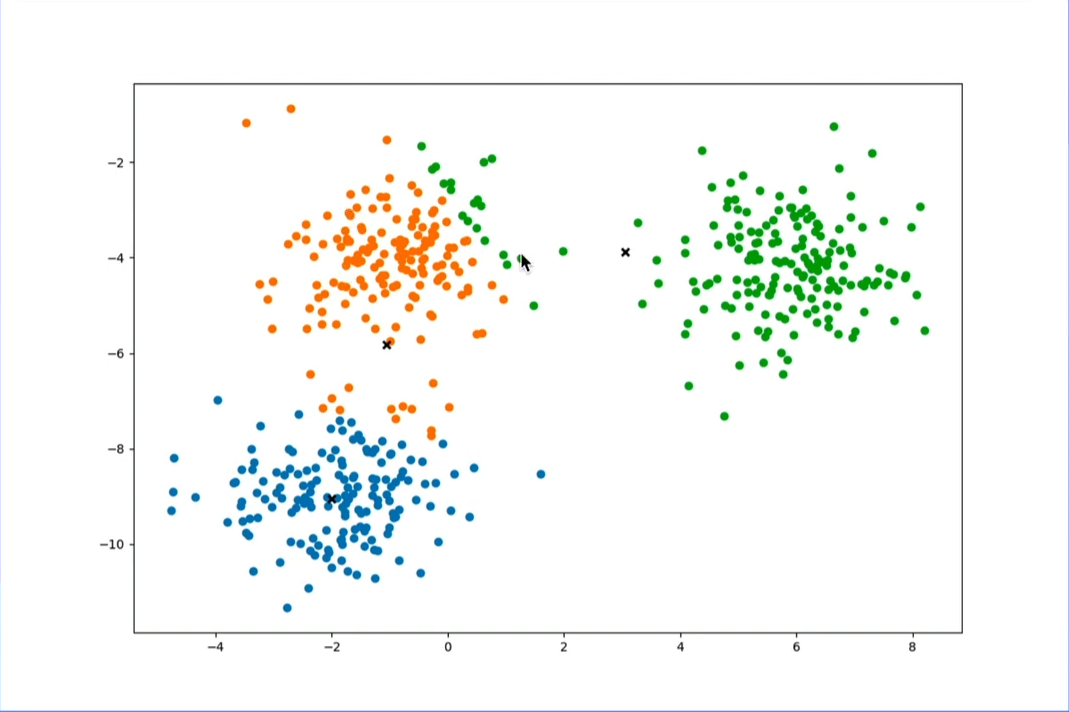

# Update the clsuter centers again
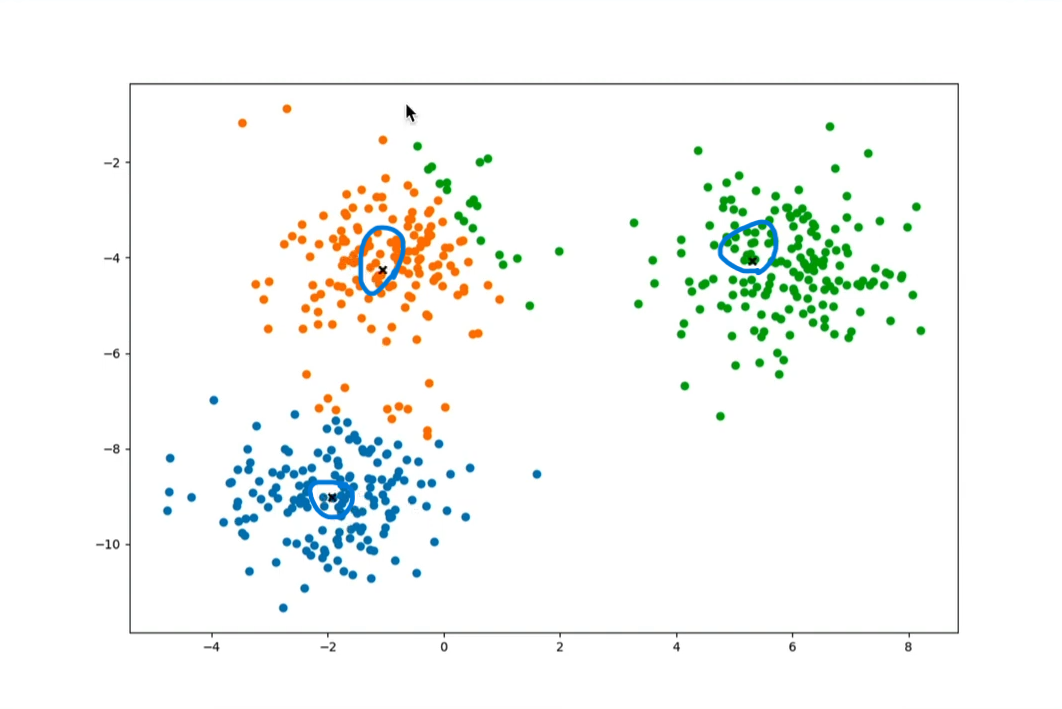


# Update the cluster labels again
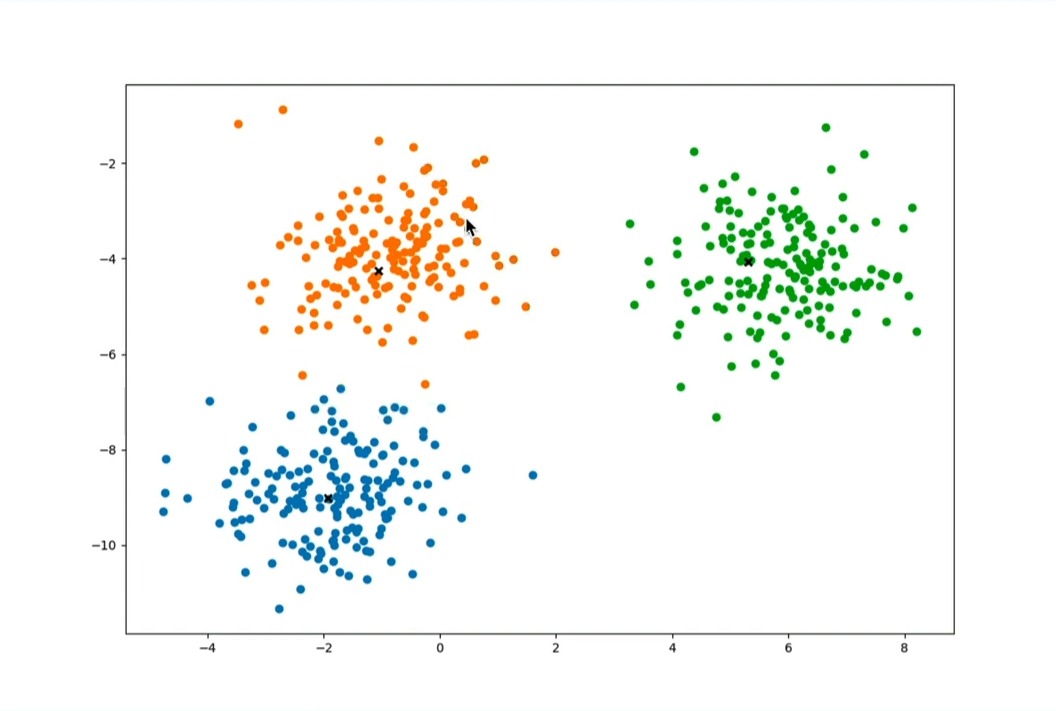

# Repeat until there is no change

# To find the nearest centroid we use Euclidean Distance

# Euclidean Distance
## Get the distance between two feature vectors
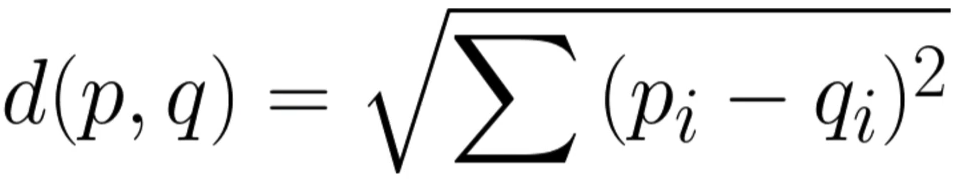

In [ ]:
def euclidean_distance(point1, point2):
  return np.sqrt(np.sum((point1 - point2)**2))

# Code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

def euclidean_distance(point1, point2):
  return np.sqrt(np.sum((point1 - point2)**2))

class KMeans:
  def __init__(self, K=5, max_iters=100, plot_steps=False):
    """
    K: The number of clusters.
    max_iters: The maximum number of iterations to run the algorithm.
    plot_steps: A flag indicating whether to plot the clustering results at each iteration.
    clusters: A list of lists, where each sublist contains the indices of the samples in a given cluster.
    centroids: A list of vectors, where each vector represents the centroid of a cluster.
    """
    self.K = K
    self.max_iters = max_iters
    self.plot_steps = plot_steps


    # List of sample indices for each cluster
    self.clusters = [[] for _ in range(self.K)]

    # the centers (mean vectors) for each cluster
    self.centroids = []


  def preidict(self, X):
    self.X = X
    self.n_samples, self.n_features = X.shape
    """
    generates a list of K unique random indices chosen from the range of integers from 0 to n_samples - 1, without replacement
    """
    # Intialize
    """
    np.random.choice(): This is a function provided by the NumPy library for random sampling. It allows you to draw random samples from a specified range.

    self.n_samples: This is the number of data samples in your dataset. It represents the total number of data points you have.

    self.K: This is the number of clusters you want to create using K-means. It specifies how many centroids you want to initialize.

    replace=False: This parameter ensures that the samples are drawn without replacement, meaning that each index can only appear once in the list of random indices. This is important for K-means initialization because you don't want to assign the same data point as the initial centroid for multiple clusters.

    So, the line of code generates a list of K unique, randomly selected indices from 0 to n_samples - 1. These indices will be used to initialize the centroids for the K-means algorithm. Each index corresponds to a data point in your dataset, and these data points will serve as the initial cluster centroids for the K-means algorithm.
    """
    random_sample_idx = np.random.choice(self.n_samples, self.K, replace=False)
    """
    self.X: This represents the dataset, which is assumed to be a collection of data points. In the context of K-means, each data point is a vector in a feature space, and you have a set of these data points that you want to cluster.

    random_sample_idx: This is a list of indices generated in the previous step using np.random.choice(). These indices correspond to the randomly selected data points that will serve as the initial centroids.
    """
    self.centroids = [self.X[idx] for idx in random_sample_idx]

    # optimization of clusters
    for _ in range(self.max_iters):
      #assign samples to closest centroids(create clusters)
      self.clusters = self._create_clusters(self.centroids)
      if self.plot_steps:
        self.plot()

      # calculate new centroids from the clusters
      centroids_old = self.centroids
      self.centroids = self._get_centroids(self.clusters)

      if self._is_converged(centroids_old, self.centroids):
        break

      if self.plot_steps:
        self.plot()

    # classify samples as the index of their clusters
    return self._get_cluster_labels(self.clusters)


  def _get_cluster_labels(self,clusters):
    # each sample will get the label of the cluster it was assigned to
    # cluster: we have list of indices of each cluster Note : see the first time this appear above in the __init__ method
    # labels = np.empty(self.n_samples) : creates an empty array to store the cluster labels for each sample. The n_samples attribute of the KMeans object contains the number of samples in the data.
    labels = np.empty(self.n_samples)
    # for cluster_idx, cluster in enumerate(clusters) iterates over the clusters in the clusters list.
    # The cluster_idx variable contains the index of the current cluster, and the cluster variable contains the list of sample indices in the current cluster.
    for cluster_idx, cluster in enumerate(clusters):
      # for sample_idx in cluster: iterates over the sample indices in the current cluster. The sample_idx variable contains the index of the current sample.
      for sample_idx in cluster:
        #  labels[sample_idx] = cluster_idx :assigns the cluster label of the current cluster to the current sample.
        labels[sample_idx] = cluster_idx
    return labels



  def _create_clusters(self, centroids):
    # assign the samples to the closest centroids
    # clusters = [[] for _ in range(self.K)]: creates a list of empty lists,
    # where the number of lists is equal to the number of clusters. This list will be used to store the cluster assignments for each sample.
    clusters = [[] for _ in range(self.K)]
    # for idx, sample in enumerate(self.X): iterates over the samples in the data. The idx variable contains the index of the current sample, and the sample variable contains the current sample.
    for idx, sample in enumerate(self.X):
      # centroid_idx = self._closest_centroid(sample, centroids) finds the index of the closest centroid for the current sample.
      # The _closest_centroid() function: is a helper function that computes the distance between the current sample and each centroid and returns the index of the closest centroid.
      centroid_idx = self._closest_centroid(sample, centroids)
      # clusters[centroid_idx].append(idx): appends the index of the current sample to the list of samples in the cluster with the closest centroid.
      clusters[centroid_idx].append(idx)
    return clusters


  def _closest_centroid(self, sample, centroids):
    # distances of the current sample to each centroid
    distances = [euclidean_distance(sample, point) for point in centroids]
    # getting the min distance and assign it to closest_idx
    closest_idx = np.argmin(distances)
    return closest_idx


  def _get_centroids(self, clusters):
    # assign mean value of clusters to centroids
    # centroids = np.zeros((self.K, self.n_features)) creates a new array of zeros with the dimensions (self.K, self.n_features).
    # The self.K attribute of the KMeans object contains the number of clusters, and the self.n_features attribute contains the number of features in the data.
    centroids = np.zeros((self.K, self.n_features))
    # for cluster_idx, cluster in enumerate(clusters): iterates over the clusters in the clusters list.
    # The cluster_idx variable contains the index of the current cluster, and the cluster variable contains the list of sample indices in the current cluster.
    for cluster_idx, cluster in enumerate(clusters):
      # cluster_mean = np.mean(self.X[cluster], axis=0) computes the mean vector of the samples in the current cluster. The np.mean() function computes the mean of the values in the self.X[cluster] array.
      # The axis=0 argument specifies that the mean should be computed over the rows of the array.
      cluster_mean = np.mean(self.X[cluster], axis=0)
      # centroids[cluster_idx] = cluster_mean assigns the mean vector of the current cluster to the corresponding centroid in the centroids array.
      centroids[cluster_idx] = cluster_mean
    return centroids

  def _is_converged(self,centroids_old,centroids):
    # distances between old and nre centroids, for all centroids
    # distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
    # computes the Euclidean distance between the old centroids and the new centroids for all centroids.
    # The euclidean_distance() function is a helper function that computes the Euclidean distance between two vectors.
    distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]

    return sum(distances) == 0

  # for ploting
  def plot(self):
    fig, ax = plt.subplots(figsize=(12,8))

    for i , index in enumerate(self.clusters):
      point = self.X[index].T
      ax.scatter(* point)

    for point in self.centroids:
      ax.scatter(*point, marker="x", color="black", linewidth=2)

    plt.show()


# Testing

In [ ]:
!pip install scikit-learn

In [ ]:
"""
Scikit-Learn, also known as sklearn is a python library to implement machine learning models and statistical modelling. Through scikit-learn,
we can implement various machine learning models for regression, classification, clustering, and statistical tools for analyzing these models.
"""

import sklearn
from sklearn.datasets import make_blobs

(500, 2)
3


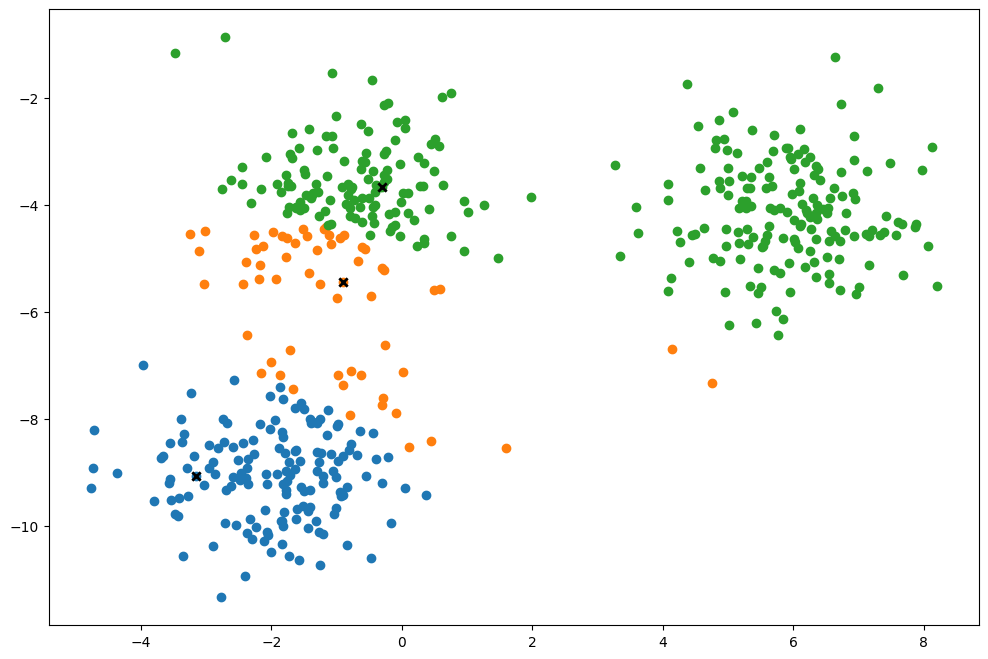

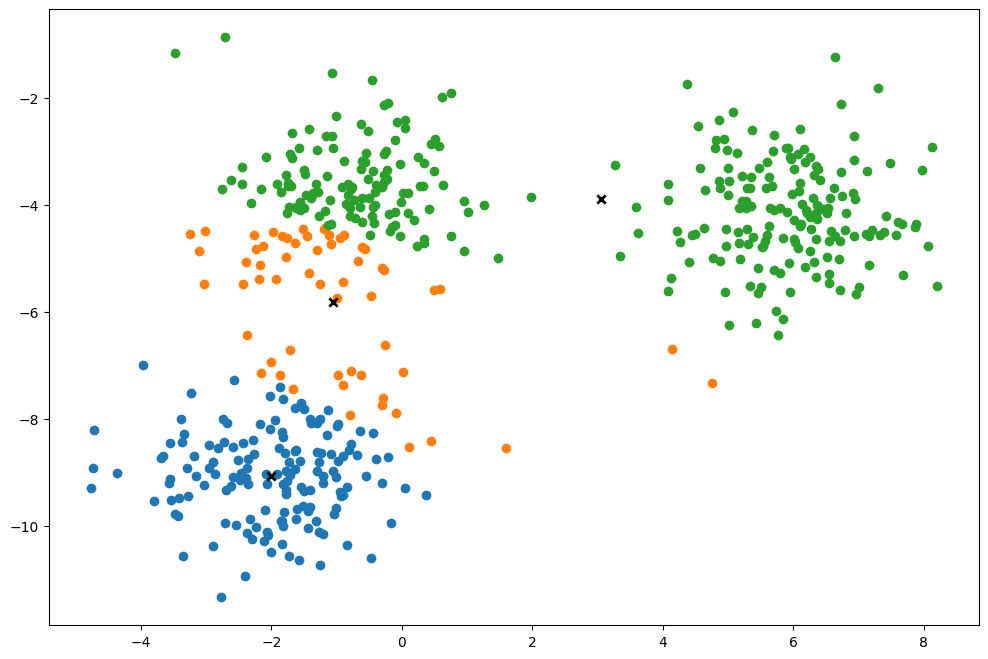

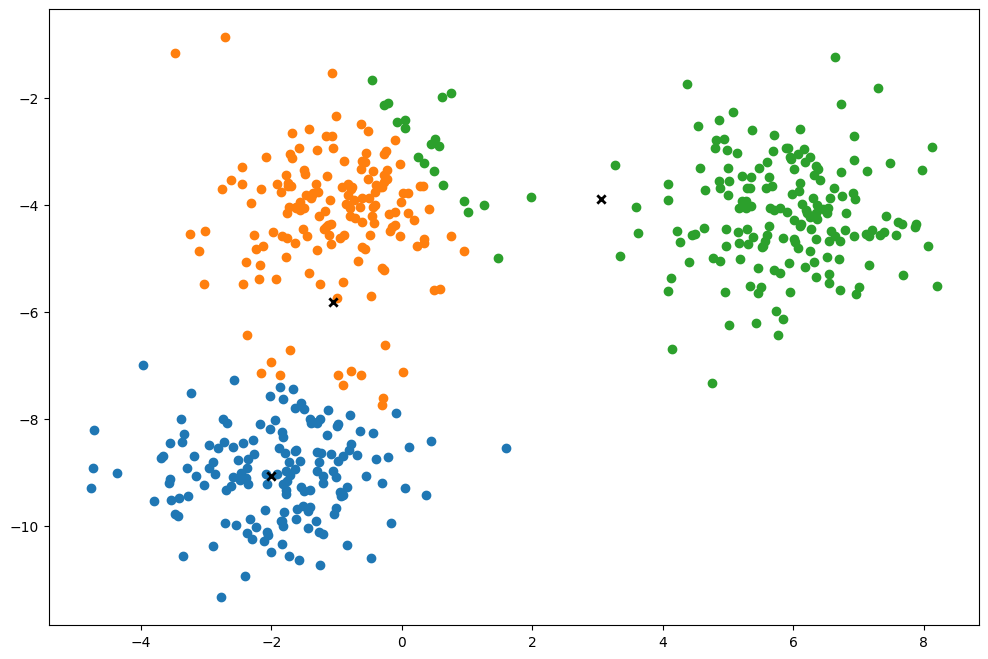

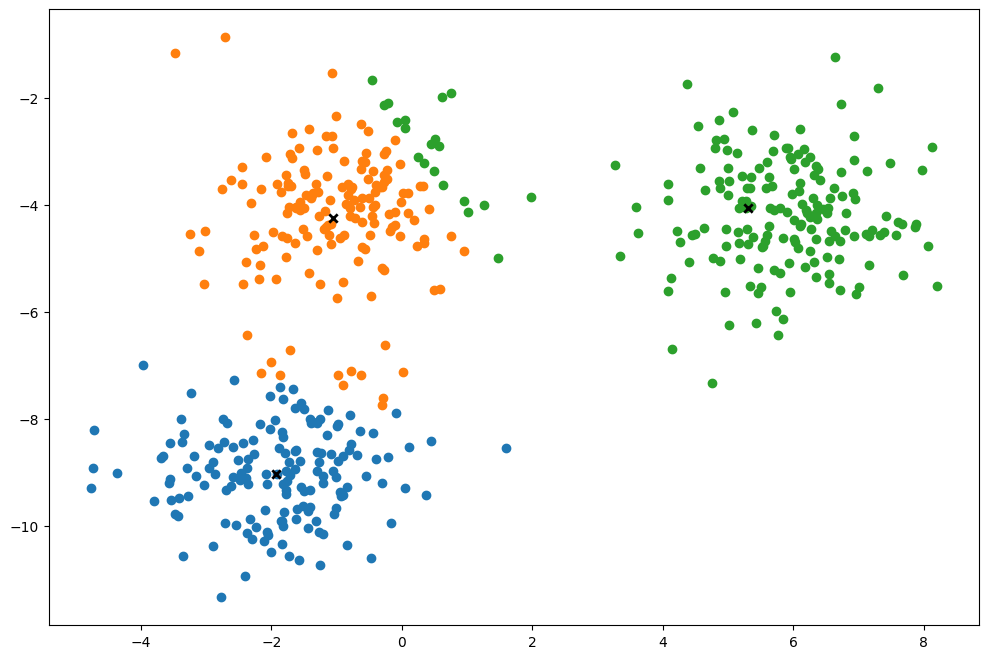

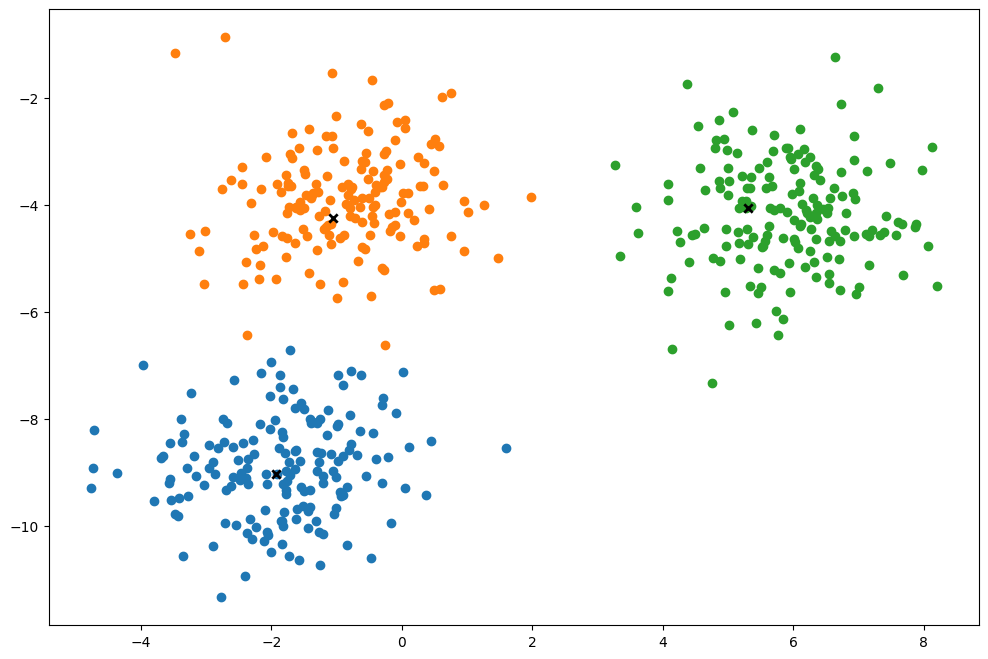

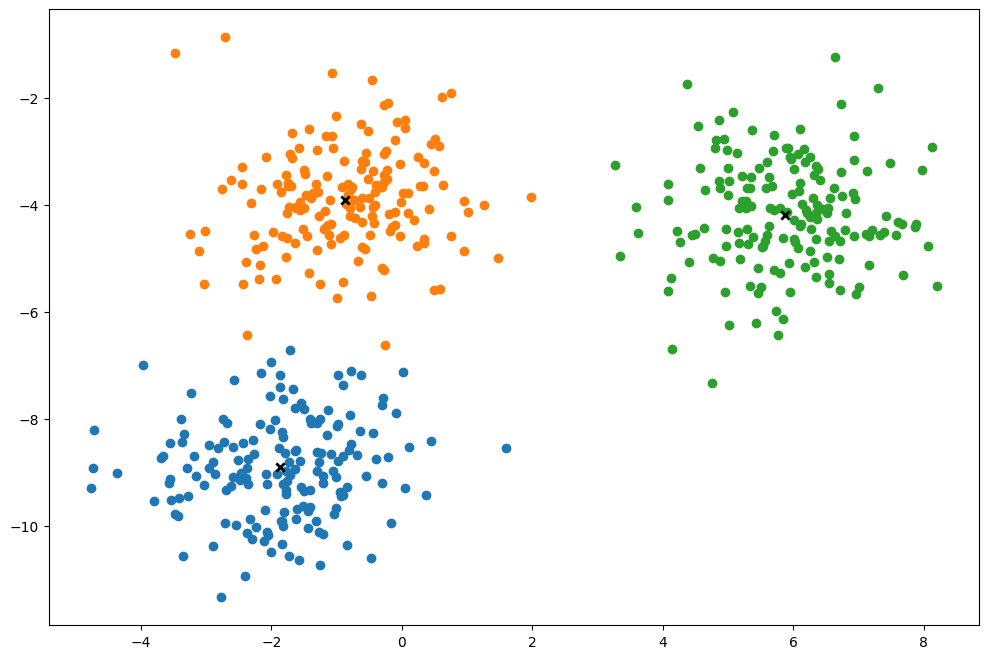

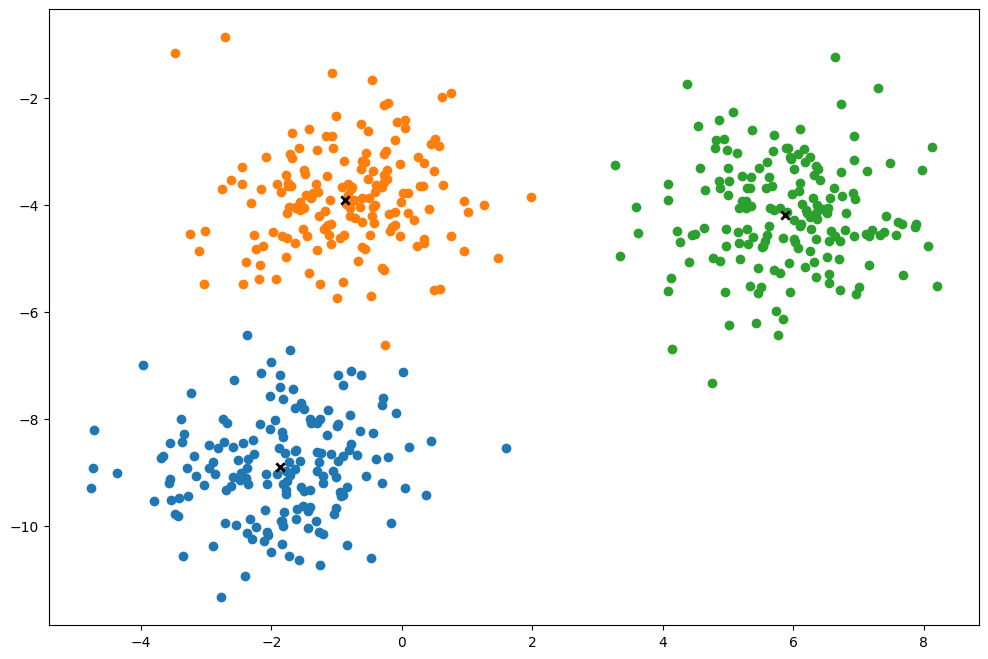

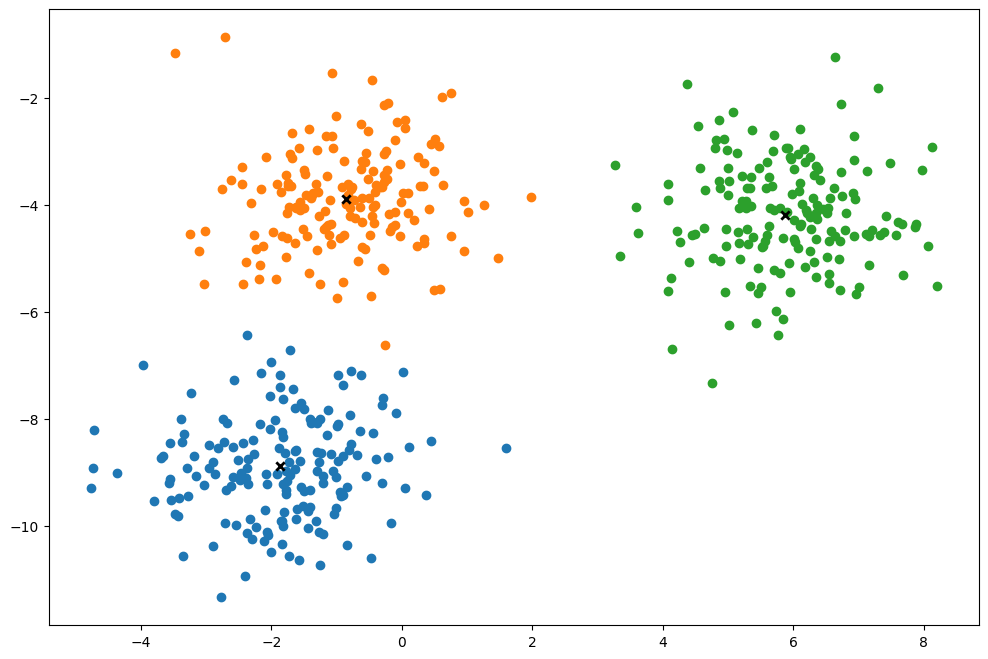

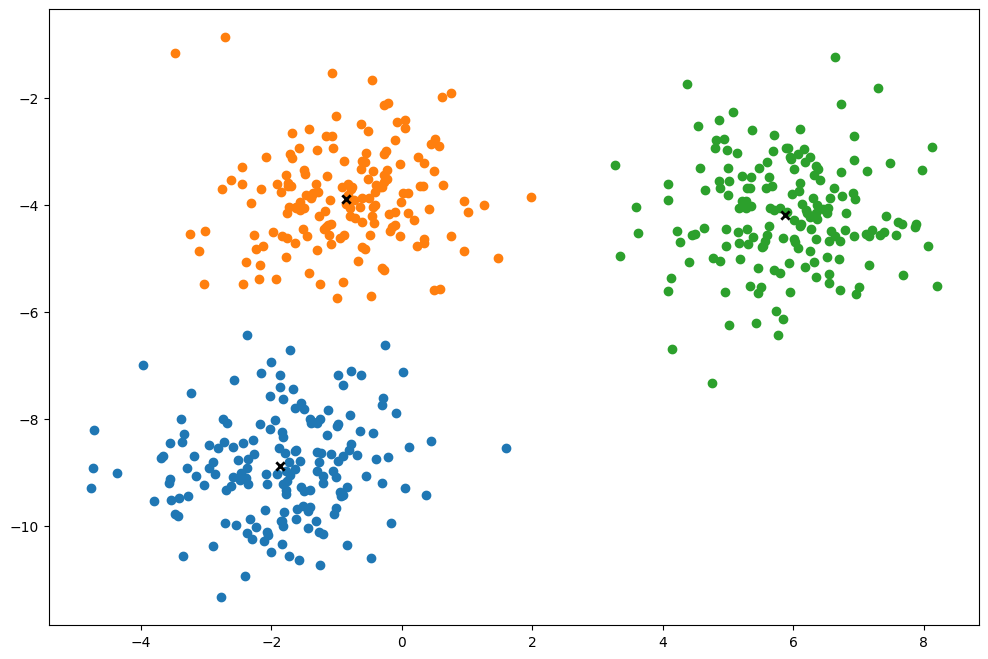

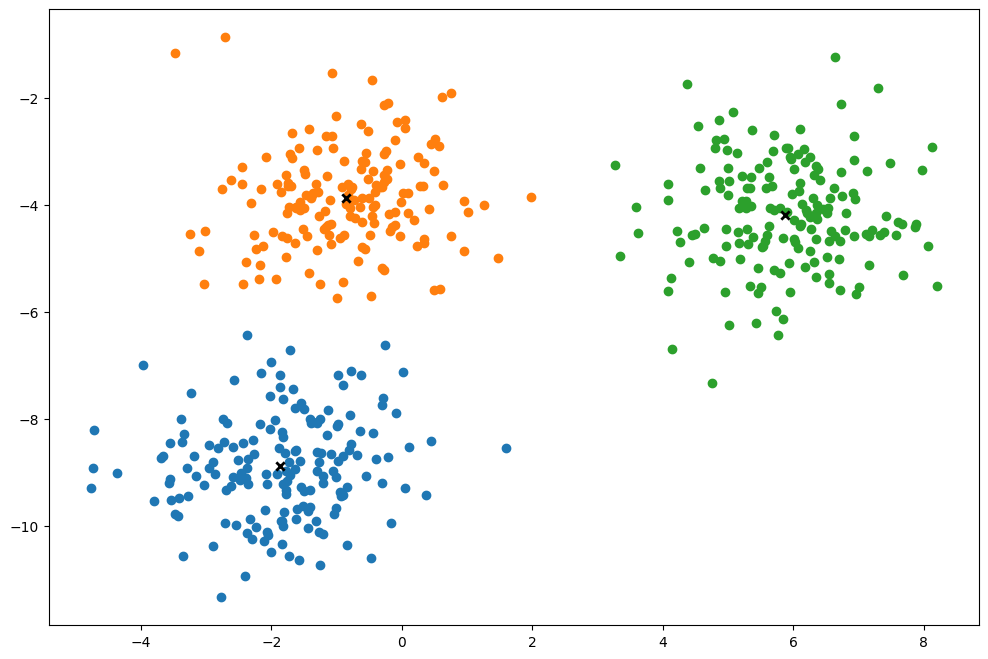

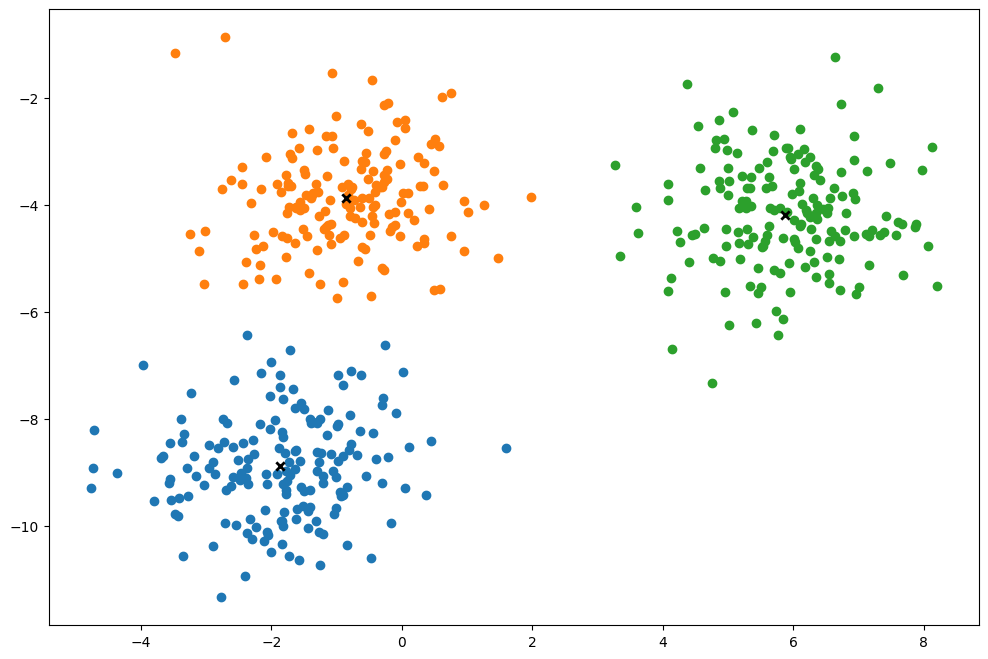

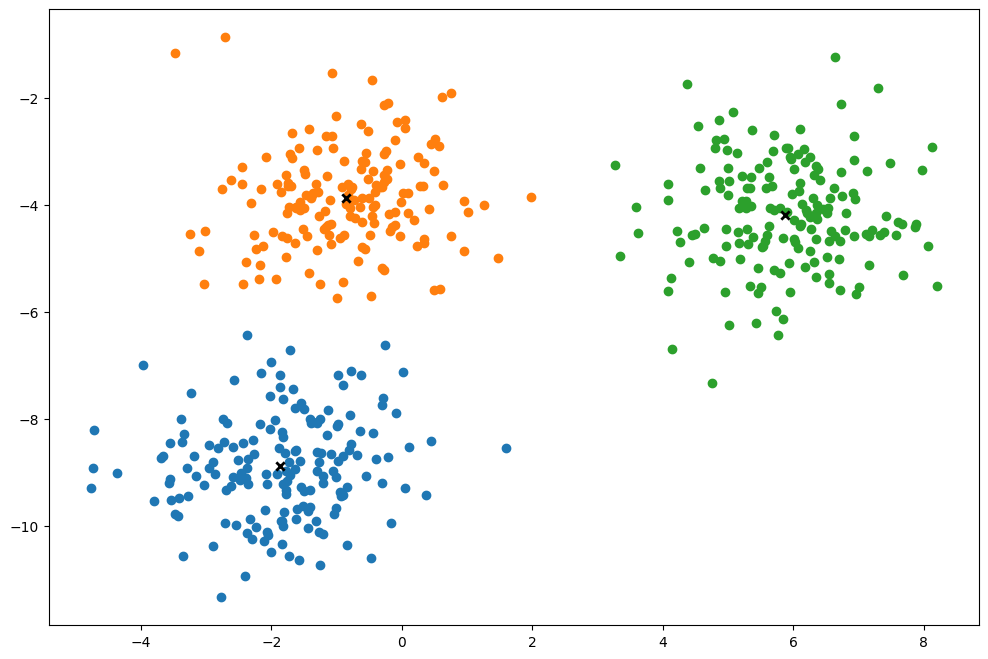

In [ ]:
if __name__ == "__main__":
    np.random.seed(42)
    from sklearn.datasets import make_blobs

    X, y = make_blobs(
        centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40
    )
    print(X.shape)

    clusters = len(np.unique(y))
    print(clusters)

    k = KMeans(K=clusters, max_iters=150, plot_steps=True)
    y_pred = k.preidict(X)

    k.plot()